<a href="https://www.kaggle.com/code/mikedelong/scatter-plots-mostly?scriptVersionId=145352611" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from glob import glob
from math import isnan

SCHOOL_FIXES = {
    'Okstate': 'OKState',
    'lsu': 'LSU'
}
def get_file(input_file):
    df = pd.read_csv(filepath_or_buffer=input_file)
    school = input_file.split('_')[-1].replace('.csv', '')
    if school in SCHOOL_FIXES.keys():
        school = SCHOOL_FIXES[school]
        df['school'] = school
    else:
        df['school'] = school.capitalize() 
    return df

def fix_int(arg, fill_value):
    if isinstance(arg, str):
        arg = arg.strip()
        if ',' in arg:
            return int(arg.strip().split(',')[0])
        else:
            return int(arg)
    if isnan(arg):
        return fill_value
    return int(arg)
    

files = list(glob(pathname='/kaggle/input/draft-picks-from-each-university/*.csv'))
df = pd.concat(objs=[get_file(input_file=input_file) for input_file in files])
df['round'] = df['Rd'].apply(func=fix_int, args=(20,)) # fill in 20 for NaN and fix comma values arbitrarily
df['overall'] = df['Overall'].apply(func=fix_int, args=(222,)) # fill in 222 for NaN
df.sample(n=5)

,Player,Year,Rd,Overall,From,To,G,MP,FG,FGA,...,FG%,3P%,FT%,MP/G,PTS/G,TRB/G,AST/G,school,round,overall
36,Steve Burks,1982,8,180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Washington,8,180
0,Elton Brand,1999,1,1.0,2000.0,2016.0,1058.0,34910.0,6599.0,13185.0,...,0.500,0.095,0.736,33.0,15.9,8.5,2.1,Duke,1,1
58,Brad Watson,1983,5,109,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona,5,109
15,Travis Leslie,2011,2,47.0,2012.0,2012.0,10.0,45.0,5.0,14.0,...,0.357,NaN,0.444,4.5,1.4,0.9,0.5,Georgia,2,47
52,Wayne Simien,2005,1,29.0,2006.0,2007.0,51.0,507.0,67.0,143.0,...,0.469,NaN,0.854,9.9,3.3,1.9,0.2,Kansas,1,29


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 58
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   691 non-null    object 
 1   Year     690 non-null    object 
 2   Rd       690 non-null    object 
 3   Overall  655 non-null    object 
 4   From     432 non-null    float64
 5   To       432 non-null    float64
 6   G        432 non-null    float64
 7   MP       425 non-null    float64
 8   FG       432 non-null    float64
 9   FGA      432 non-null    float64
 10  3P       377 non-null    float64
 11  3PA      377 non-null    float64
 12  FT       432 non-null    float64
 13  FTA      432 non-null    float64
 14  ORB      394 non-null    float64
 15  TRB      428 non-null    float64
 16  AST      432 non-null    float64
 17  STL      380 non-null    float64
 18  BLK      380 non-null    float64
 19  TOV      388 non-null    float64
 20  PF       432 non-null    float64
 21  PTS      432 non-null 

In [3]:
from plotly.express import scatter
scatter(data_frame=df, x='G', y='MP', color='PTS', hover_name='Player', hover_data=['school'], log_x=True, log_y=True)

Not surprisingly minutes played tracks games played more or less linearly (on a log-log plot).

In [4]:
scatter(data_frame=df, x='G', y='PTS', color='round', hover_name='Player', hover_data=['school'], log_x=True, log_y=True)

Similarly points follows games played linearly (on a log-log plot), and not surprisingly almost no one drafted outside the first couple of rounds makes much of an impact.

In [5]:
scatter(data_frame=df, x='G', y='PTS', color='overall', hover_name='Player', hover_data=['school'], log_x=True, log_y=True)

In [6]:
scatter(data_frame=df, x='G', y='PTS', color='school', hover_name='Player', hover_data=['overall'], log_x=True, log_y=True)

We really can't tease out the impact of being part of a marquee program from this dataset but it is interesting to see how players from all schools end up in different parts of the distribution.

In [7]:
scatter(data_frame=df, x='FT', y='3P', color='overall', hover_name='Player', hover_data=['school'], log_x=False, log_y=False, trendline='ols')

Scoring point one at a time vs. three at a time is not strongly correlated.

In [8]:
scatter(data_frame=df, x='FT', y='3P', color='overall', hover_name='Player', hover_data=['school'], log_x=True, log_y=True, trendline='ols')

In [9]:
from plotly.express import histogram
histogram(data_frame=df, x='G', color='school')

In [10]:
histogram(data_frame=df, x='PTS', color='school', log_y=True)

(-0.5, 1199.5, 1199.5, -0.5)

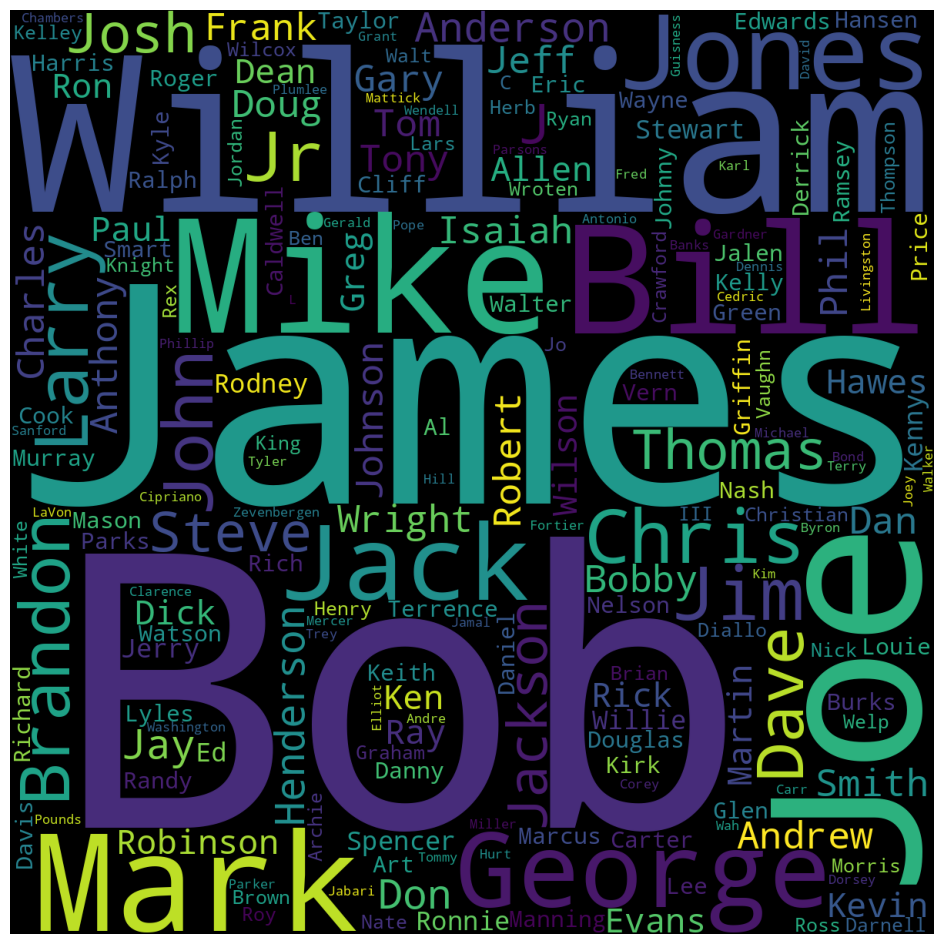

In [11]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['Player'].values.tolist())), )
axis('off')